In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:54<00:00, 22.2MB/s]
100% 1.06G/1.06G [00:54<00:00, 21.1MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , BatchNormalization , Dropout
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping

In [11]:
#generator

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),

)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
#Normalize

def process(image , label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [24]:
model = Sequential()
model.add(Conv2D(32 , kernel_size=(3,3) , padding = "same" , activation = "relu" , input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2) , strides = 2 , padding="valid"))
model.add(BatchNormalization())

model.add(Conv2D(64 , kernel_size=(3,3) , padding = "same" , activation = "relu" ))
model.add(MaxPooling2D(pool_size=(2,2) , strides = 2 , padding="valid"))
model.add(BatchNormalization())

model.add(Conv2D(128 , kernel_size=(3,3) , padding = "same" , activation = "relu" ))
model.add(MaxPooling2D(pool_size=(2,2) , strides = 2 , padding="valid"))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128 , activation = "relu" ,kernel_regularizer=regularizers.l2(0.01) ))
model.add(Dropout(0.3))
model.add(Dense(64 , activation = "relu" , kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32 , activation = "relu" , kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1 , activation = "sigmoid"))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                      

In [26]:
model.compile(optimizer = "Adam" , loss = "binary_crossentropy" , metrics = ["accuracy"])

In [27]:
cb = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [28]:
history = model.fit(train_ds , epochs = 10 , validation_data=val_ds , callbacks=cb)

Epoch 1/10
625/625 [==============================] - 66s 97ms/step - loss: 5.2114 - accuracy: 0.5338 - val_loss: 1.6646 - val_accuracy: 0.5544
Epoch 2/10
625/625 [==============================] - 61s 97ms/step - loss: 1.5406 - accuracy: 0.6091 - val_loss: 1.4199 - val_accuracy: 0.6634
Epoch 3/10
625/625 [==============================] - 60s 96ms/step - loss: 1.3388 - accuracy: 0.6820 - val_loss: 1.3476 - val_accuracy: 0.6418
Epoch 4/10
625/625 [==============================] - 60s 95ms/step - loss: 1.1349 - accuracy: 0.7260 - val_loss: 1.0313 - val_accuracy: 0.7490
Epoch 5/10
625/625 [==============================] - 59s 93ms/step - loss: 0.9673 - accuracy: 0.7533 - val_loss: 0.9375 - val_accuracy: 0.7402
Epoch 6/10
625/625 [==============================] - 60s 96ms/step - loss: 0.9145 - accuracy: 0.7725 - val_loss: 0.9168 - val_accuracy: 0.7806
Epoch 7/10
625/625 [==============================] - 57s 91ms/step - loss: 0.9242 - accuracy: 0.7830 - val_loss: 0.9803 - val_accuracy:

In [17]:
import matplotlib.pyplot as plt


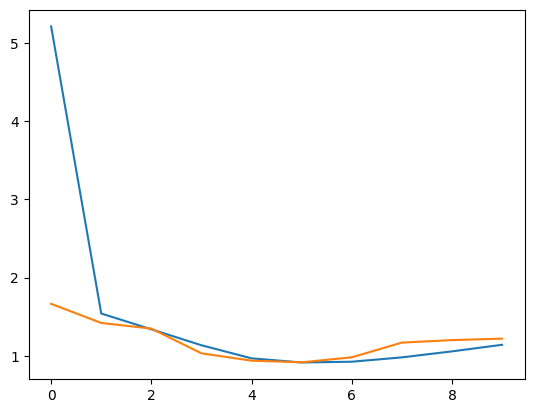

In [30]:
plt.plot(history.history["loss"] , label = "train_loss")
plt.plot(history.history["val_loss"] , label = "val_loss")

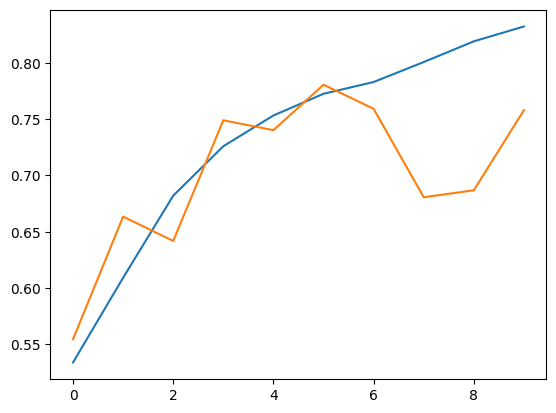

In [32]:
plt.plot(history.history["accuracy"] , label = "train_acc")
plt.plot(history.history["val_accuracy"] , label = "val_acc")

In [60]:
import cv2

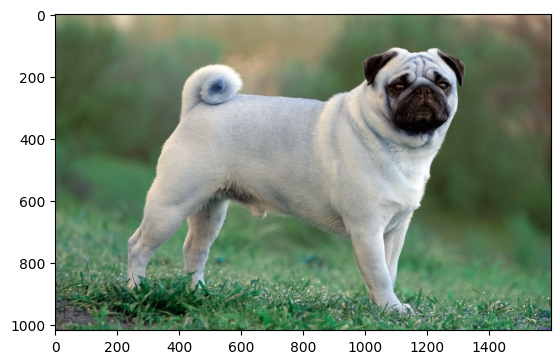

In [62]:
test_img = cv2.imread('/content/Pug-dog.webp')
plt.imshow(test_img)


In [63]:
test_img = test_img/255

In [64]:
test_img

array([[[0.60784314, 0.61568627, 0.48235294],
        [0.60784314, 0.61568627, 0.48235294],
        [0.60784314, 0.61568627, 0.48235294],
        ...,
        [0.66666667, 0.59215686, 0.49411765],
        [0.66666667, 0.59215686, 0.49411765],
        [0.6627451 , 0.58431373, 0.49019608]],

       [[0.60784314, 0.61568627, 0.48235294],
        [0.60784314, 0.61568627, 0.48235294],
        [0.60784314, 0.61568627, 0.48235294],
        ...,
        [0.6627451 , 0.58431373, 0.49019608],
        [0.65490196, 0.58039216, 0.48627451],
        [0.65098039, 0.57647059, 0.48235294]],

       [[0.60784314, 0.61568627, 0.48235294],
        [0.60784314, 0.61568627, 0.48235294],
        [0.60784314, 0.61568627, 0.48235294],
        ...,
        [0.65098039, 0.57647059, 0.48235294],
        [0.65098039, 0.57647059, 0.48235294],
        [0.65098039, 0.57647059, 0.48235294]],

       ...,

       [[0.43137255, 0.50196078, 0.41960784],
        [0.41568627, 0.49019608, 0.40784314],
        [0.39607843, 0

In [65]:
test_img.shape

(1019, 1600, 3)

In [66]:
test_img = cv2.resize(test_img , (256 , 256))

In [67]:
test_img.shape

(256, 256, 3)

In [68]:
test_input = test_img.reshape((1,256,256,3))

In [71]:
out = model.predict(test_input)
out

1/1 [==============================] - 0s 59ms/step


array([[0.84985435]], dtype=float32)

In [70]:
if out>0.5:
  print("dog")
else:
  print("cat")

dog


In [73]:
model.save('dog_cat_model.h5')